# Machine Learning - PreProcessing
This notebook prepares the data for an artificial recurrent neural network called Long Short Term Memory (LSTM) using the past 60 days stock price of (Apple Inc)

In [57]:
# Initial imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split

In [58]:
# Get the stock data using yahoo source
df = web.DataReader(['AAPL'], data_source='yahoo', start='2016-01-01', end='2021-01-15')
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2016-01-04,24.400942,26.337500,26.342501,25.500000,25.652500,270597600.0
2016-01-05,23.789471,25.677500,26.462500,25.602501,26.437500,223164000.0
2016-01-06,23.323915,25.174999,25.592501,24.967501,25.139999,273829600.0
2016-01-07,22.339539,24.112499,25.032499,24.107500,24.670000,324377600.0
2016-01-08,22.457672,24.240000,24.777500,24.190001,24.637501,283192000.0
...,...,...,...,...,...,...
2021-01-11,128.979996,128.979996,130.169998,128.500000,129.190002,100620900.0
2021-01-12,128.800003,128.800003,129.690002,126.860001,128.500000,91951100.0


In [81]:
# Get the number of rows and columns in the data set
 df.shape

IndentationError: unexpected indent (<ipython-input-81-58896e2680db>, line 2)

<function matplotlib.pyplot.show(*args, **kw)>

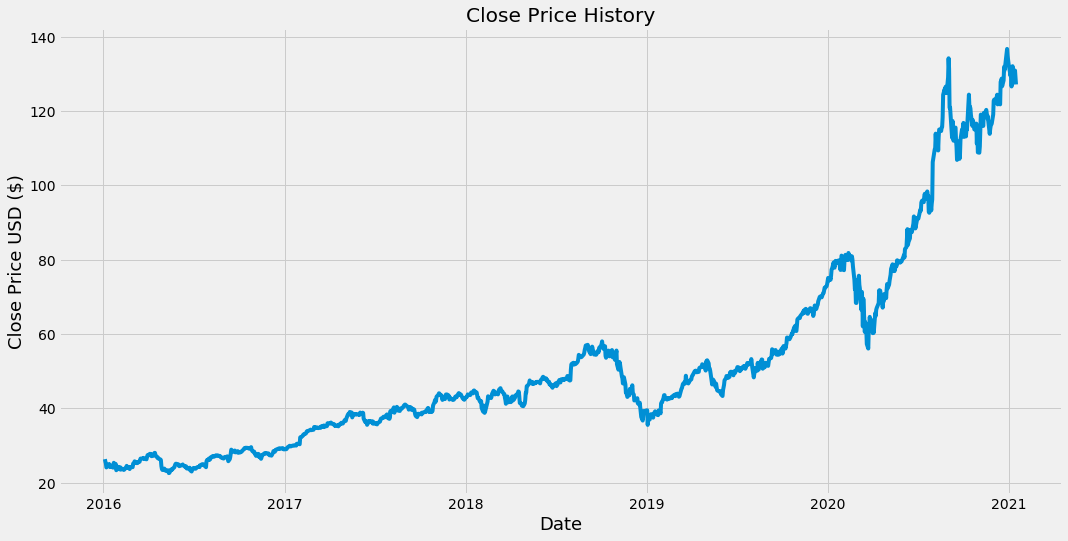

In [62]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [63]:
# Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
modeling_data = data.iloc[0:1016]
dataset = modeling_data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len, len(data)

TypeError: Expected tuple, got str

In [64]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

NameError: name 'dataset' is not defined

In [65]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()

NameError: name 'scaled_data' is not defined

In [66]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

NameError: name 'x_train' is not defined

In [67]:
# Reshape the data
x_train.shape

NameError: name 'x_train' is not defined

In [68]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_train.shape

NameError: name 'x_train' is not defined

In [69]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=1)

NameError: name 'x_train' is not defined

In [70]:
# Create the testing data set
# Create a new array containing scaled values from index 1266 to 953
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt( np.mean( predictions - y_test )**2 )



NameError: name 'scaled_data' is not defined

In [71]:

len(valid)

NameError: name 'valid' is not defined

In [72]:
train = modeling_data[]
valid = modeling_data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-72-4d90c9ccfb6e>, line 1)

In [73]:
valid

NameError: name 'valid' is not defined

In [74]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-25')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test, steps=10)
# Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [75]:
# Plot the forecasted return for the next 10 days
valid.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Closing Price Prediction over the next 10 Days - LSTM", fontsize=25);

SyntaxError: unmatched ')' (<ipython-input-75-7b524308a3e8>, line 2)